# Online course completion rate prediction

Problem Statement:
    
High dropout rates in online courses lead to low learner engagement and reduced platform credibility.

Data set name:online_course_engagement_daya.csv

#STEP 1 : LOAD DATA

In [6]:
df = pd.read_csv(r"C:\Users\sudha\Downloads\olive- online course completion.csv")

# Preview
print(df.info)

<bound method DataFrame.info of       UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0       5618         Health          29.979719                     17   
1       4326           Arts          27.802640                      1   
2       5849           Arts          86.820485                     14   
3       4992        Science          35.038427                     17   
4       3866    Programming          92.490647                     16   
...      ...            ...                ...                    ...   
8995    8757         Health          37.445225                     14   
8996     894        Science          48.631443                      7   
8997    6323         Health          38.212512                      3   
8998    3652         Health          70.048665                     13   
8999    5595         Health          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                    

In [7]:
print(df.shape)

(9000, 9)


In [8]:
print(df.head())

   UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  


#STEP 2 – Data Cleaning & Preprocessing

In [ ]:
# Drop UserID
df.drop('UserID', axis=1, inplace=True)

In [18]:
print(df.columns.tolist())

['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion', 'CourseCategory_Business', 'CourseCategory_Health', 'CourseCategory_Programming', 'CourseCategory_Science']


In [19]:
#Check Categorical Columns
# Check exact columns
print(df.columns.tolist())

# Check category counts only if the column still exists
if 'CourseCategory' in df.columns:
    print(df['CourseCategory'].value_counts())
else:
    print("CourseCategory no longer exists as a single column. It's been one-hot encoded.")

['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion', 'CourseCategory_Business', 'CourseCategory_Health', 'CourseCategory_Programming', 'CourseCategory_Science']
CourseCategory no longer exists as a single column. It's been one-hot encoded.


In [10]:
# One-Hot Encode CourseCategory
df = pd.get_dummies(df, columns=['CourseCategory'], drop_first=True)

In [11]:
# Check DeviceType
print(df['DeviceType'].value_counts()) #desktop=0,mobile=1

1    4506
0    4494
Name: DeviceType, dtype: int64


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = [
    "TimeSpentOnCourse",
    "NumberOfVideosWatched",
    "NumberOfQuizzesTaken",
    "QuizScores",
    "CompletionRate"
]

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [21]:
print(df.head())
print(df.describe())

   TimeSpentOnCourse  NumberOfVideosWatched  NumberOfQuizzesTaken  QuizScores  \
0          -0.708459               1.156859             -0.662074   -1.692939   
1          -0.784874              -1.496741             -0.028679   -0.840896   
2           1.286643               0.659309             -0.978771    0.261027   
3          -0.530899               1.156859              1.554809   -1.078566   
4           1.485664               0.991009             -1.612166    1.649947   

   CompletionRate  DeviceType  CourseCompletion  CourseCategory_Business  \
0       -1.018308           1                 0                        0   
1        0.528242           1                 0                        0   
2        0.465359           1                 1                        0   
3        1.557651           0                 1                        0   
4       -1.113588           0                 0                        0   

   CourseCategory_Health  CourseCategory_Programming  Co

STEP 3 – Exploratory Data Analysis (EDA)

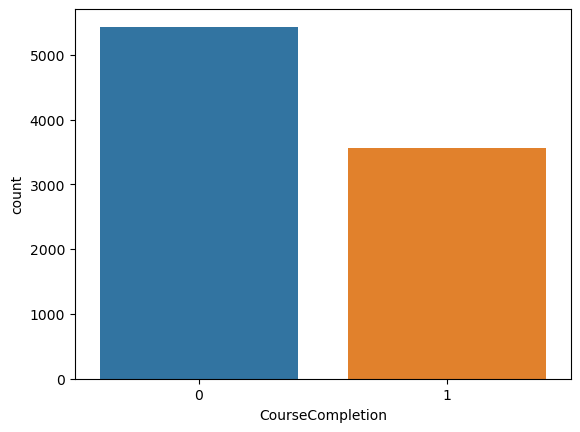

In [22]:
#Plot Target Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="CourseCompletion", data=df)
plt.show()

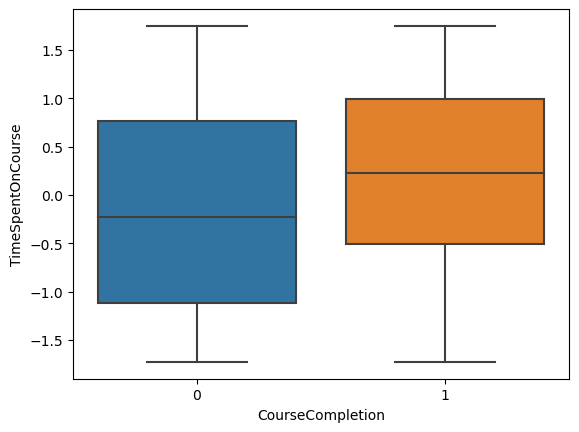

In [23]:
sns.boxplot(x="CourseCompletion", y="TimeSpentOnCourse", data=df)
plt.show()

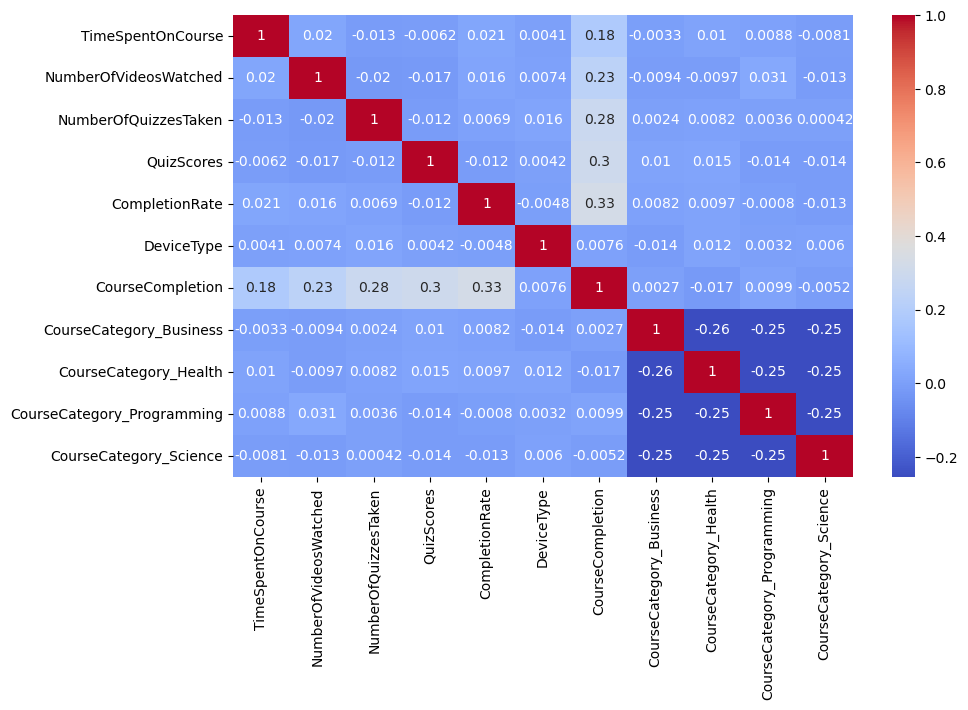

In [24]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

STEP 4 – Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("CourseCompletion", axis=1)
y = df["CourseCompletion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STEP 5 – Build & Evaluate Models

In [26]:
# Model 1 – Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1068
           1       0.76      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800



In [27]:
# Model 2 – Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.94       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800



#STEP 6 – Hyperparameter Tuning

In [29]:
#Grid Search Example for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_rf = grid.best_estimator_

# Predict
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Results:\n")
print(classification_report(y_test, y_pred_best_rf))

Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Results:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.95       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800



#STEP6:Unsupervised Learning Component (Optional)


✅ Cluster Counts:
 0    3280
2    2902
1    2818
Name: Cluster, dtype: int64


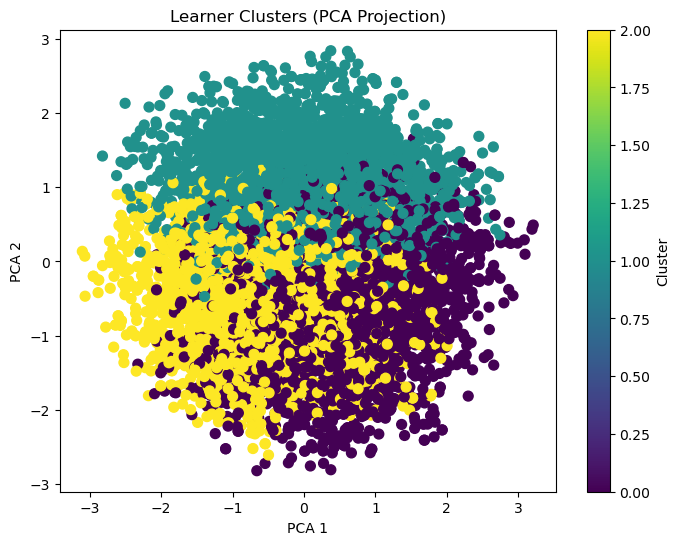

C:\Users\sudha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sudha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


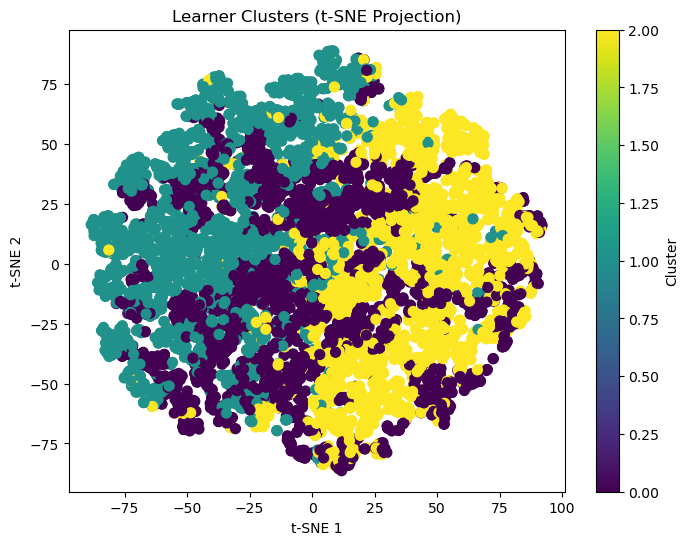


✅ Cluster Feature Means:

         TimeSpentOnCourse  NumberOfVideosWatched  NumberOfQuizzesTaken  \
Cluster                                                                   
0                -0.007824              -0.065880              0.096359   
1                -0.070336              -0.020099              0.888598   
2                 0.077143               0.093979             -0.971787   

         QuizScores  CompletionRate  DeviceType  CourseCompletion  \
Cluster                                                             
0          1.062146       -0.022581    0.499390          0.569817   
1         -0.696763        0.025491    0.506742          0.390348   
2         -0.523901        0.000769    0.496210          0.206409   

         CourseCategory_Business  CourseCategory_Health  \
Cluster                                                   
0                       0.208537               0.212195   
1                       0.194819               0.206884   
2              

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df = pd.read_csv(r"C:\Users\sudha\Downloads\olive- online course completion.csv")

# Drop UserID if still there
if "UserID" in df.columns:
    df.drop("UserID", axis=1, inplace=True)

# If CourseCategory still exists, one-hot encode
if "CourseCategory" in df.columns:
    df = pd.get_dummies(df, columns=["CourseCategory"], drop_first=True)

# Check numeric columns for scaling
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    "TimeSpentOnCourse",
    "NumberOfVideosWatched",
    "NumberOfQuizzesTaken",
    "QuizScores",
    "CompletionRate"
]

# Only scale if they exist
existing_numeric = [col for col in numeric_cols if col in df.columns]

if existing_numeric:
    scaler = StandardScaler()
    df[existing_numeric] = scaler.fit_transform(df[existing_numeric])

# Drop target for unsupervised learning
if "CourseCompletion" in df.columns:
    X_cluster = df.drop("CourseCompletion", axis=1)
else:
    X_cluster = df.copy()

# 2. Run K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)

df["Cluster"] = clusters

print("\n✅ Cluster Counts:\n", df["Cluster"].value_counts())

# 3. Visualize Clusters with PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    cmap="viridis",
    s=50
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Learner Clusters (PCA Projection)")
plt.colorbar(label="Cluster")
plt.show()

# 4. Visualize Clusters with t-SNE (Optional)

try:
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    X_tsne = tsne.fit_transform(X_cluster)

    plt.figure(figsize=(8,6))
    plt.scatter(
        X_tsne[:,0],
        X_tsne[:,1],
        c=clusters,
        cmap="viridis",
        s=50
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("Learner Clusters (t-SNE Projection)")
    plt.colorbar(label="Cluster")
    plt.show()
except Exception as e:
    print("t-SNE failed:", e)


# 5. Summarize Clusters

print("\n✅ Cluster Feature Means:\n")
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)